# Notebook error analysis 

## Select interesting exception types for further analysis based on crash-related ML libraries

lib-exception relationship  -  the selected (from kaggle) popular ML libs + on filtered nbs(that use the selected libraries)

#### Selection criterion (Revised):
To select the error types to investigate deeper (higher percentages of using the most popular ML libraries)

1. exclude exception types: nameerror, keyboardinterrupt, modulenotfounderror, filenotfounderror, importerror, oserror, memoryerror, ioerror, unicodeerror.

    <strike>total amount of the library errors in each exception type needs to be greater than 400, or, >=80% of the errors in each exception type are from the library list<strike>

    <strike>400 is for meaningful clustering<strike>
        
    <strike>80% is for meaningful manual inspect without clustering techniques<strike>
    
2. Plot __#library errors vs. exception types__ and __%library errors vs. exception types__
        
    Select based on __elbow points__

## 1. GitHub errors

exception selection based on criterion

In [1]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error\analysis_gerr"
df2_err = pd.read_excel(path_err_nbs+"/nberror_g_all_p6.xlsx")

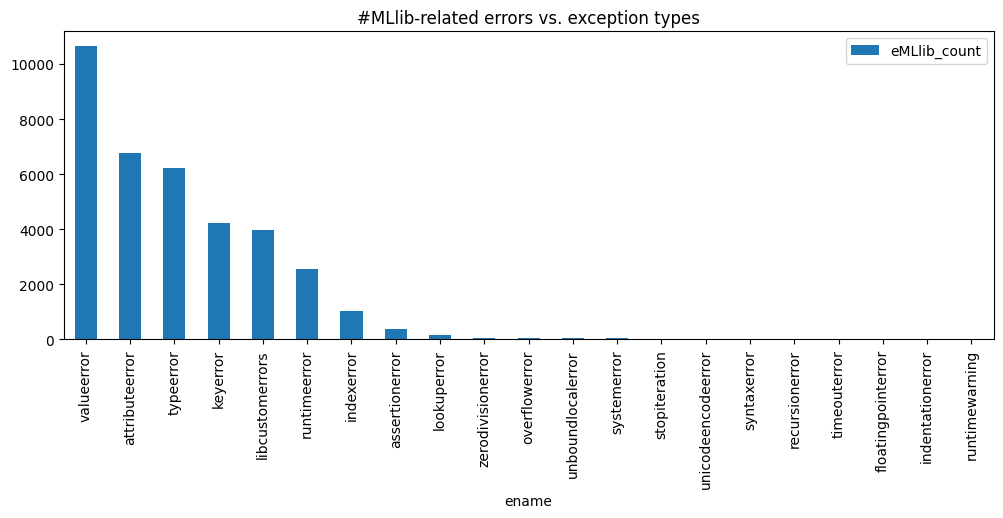

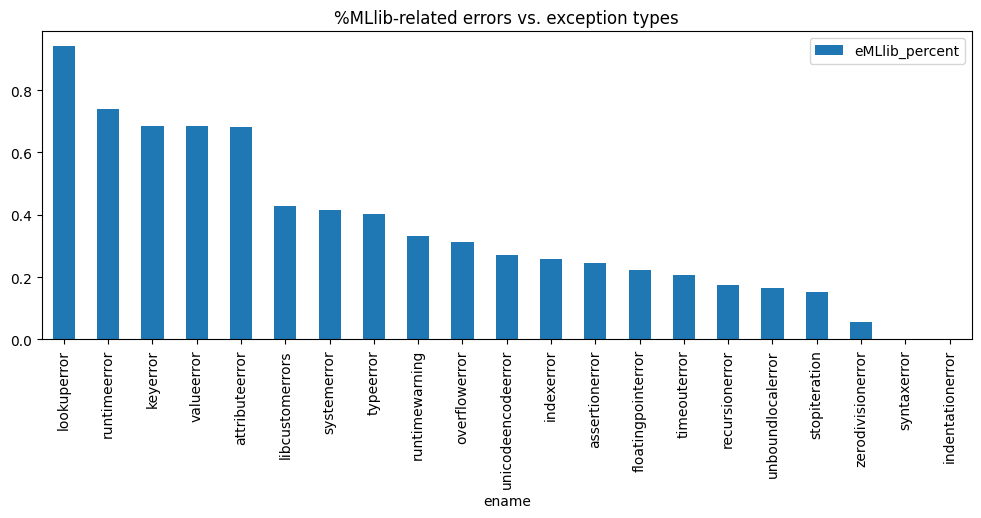

(                 ename  eMLlib_count
 0           valueerror         10652
 1       attributeerror          6768
 2            typeerror          6233
 3             keyerror          4227
 4      libcustomerrors          3967
 5         runtimeerror          2561
 6           indexerror          1012
 7       assertionerror           391
 8          lookuperror           146
 9    zerodivisionerror            55
 10       overflowerror            47
 11   unboundlocalerror            45
 12         systemerror            36
 13       stopiteration            29
 14  unicodeencodeerror            13
 15         syntaxerror             9
 16      recursionerror             9
 17        timeouterror             7
 18  floatingpointerror             2
 19    indentationerror             1
 20      runtimewarning             1,
                  ename  eMLlib_percent
 0          lookuperror        0.941935
 1         runtimeerror        0.738253
 2             keyerror        0.685422
 3 

In [2]:
util.visulize_exps_MLlibs(df2_err)

In [3]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_g_error\analysis_gerr"
df2_err = pd.read_excel(path_err_nbs+"/nberror_g_all_p6.xlsx")
util.select_builtin_exps(df2_err, "github")

Selected exception types of github that meet the criterions:

valueerror(15570), 68.41%(10652) are with the top libraries, top 3:
	pandas               2360 samples
	sklearn              2336 samples
	numpy                2167 samples
typeerror(15444), 40.36%(6233) are with the top libraries, top 3:
	numpy                2202 samples
	pandas               1527 samples
	torch                 821 samples
attributeerror(9922), 68.21%(6768) are with the top libraries, top 3:
	pandas               1755 samples
	numpy                1684 samples
	torch                1119 samples
libcustomerrors(9296), 42.67%(3967) are with the top libraries, top 3:
	tensorflow           1385 samples
	pandas                848 samples
	numpy                 671 samples
keyerror(6167), 68.54%(4227) are with the top libraries, top 3:
	pandas               3662 samples
	numpy                 290 samples
	tensorflow             62 samples
indexerror(3903), 25.93%(1012) are with the top libraries, top 3:
	numpy  

In [6]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df2_err["traceback"][(df2_err["ename"]==print_ename)&~df2_err["lib_parsed_pop"].isnull()]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<timed eval> in <module>

<ipython-input-36-8f18ffca7336> in train_bert(model, train_loader, epochs)
     28             epoch_loss += loss
     29 
---> 30             loss.backward()
     31             torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)  # Gradient clipping is not in AdamW anymore (so you can use amp without issue)
     32             optimizer.step()

~/cs224u/venv/lib/python3.6/site-packages/torch/tensor.py in backward(self, gradient, retain_graph, create_graph)
    164                 products. Defaults to ``False``.
    165         """
--> 166         torch.autograd.backward(self, gradient, retain_graph, create_graph)
    167 
    168     def register_hook(self, hook):

~/cs224u/venv/lib/python3.6/site-packages/torch/autograd/__init__.py in backward(tensors, grad_tensors, retain_graph, create_graph,

## 2. Kaggle errors

exception selection based on criterion

In [4]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error\analysis_kerr"
df_err = pd.read_excel(path_err_nbs+"/nberror_k_p5.xlsx")

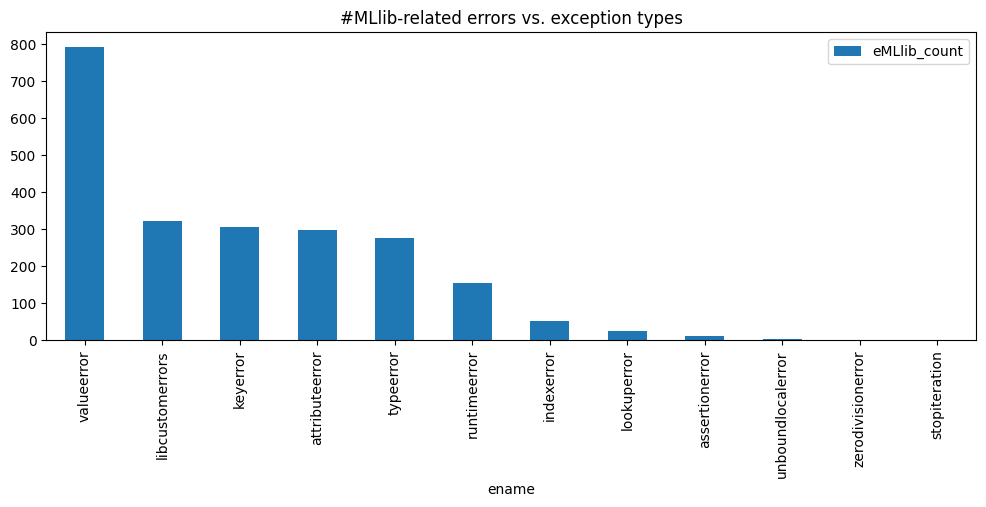

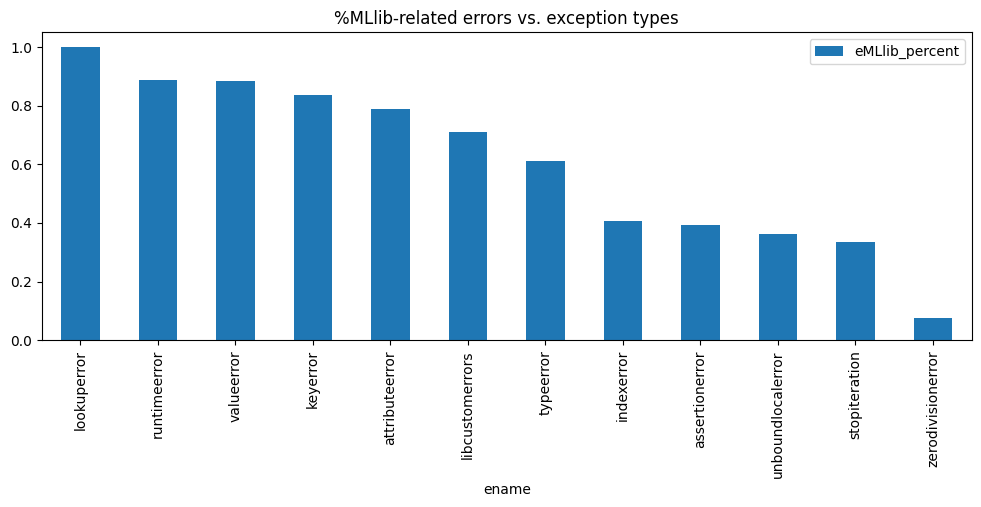

(                ename  eMLlib_count
 0          valueerror           793
 1     libcustomerrors           322
 2            keyerror           307
 3      attributeerror           299
 4           typeerror           277
 5        runtimeerror           156
 6          indexerror            53
 7         lookuperror            26
 8      assertionerror            11
 9   unboundlocalerror             4
 10  zerodivisionerror             1
 11      stopiteration             1,
                 ename  eMLlib_percent
 0         lookuperror        1.000000
 1        runtimeerror        0.886364
 2          valueerror        0.885045
 3            keyerror        0.836512
 4      attributeerror        0.788918
 5     libcustomerrors        0.709251
 6           typeerror        0.610132
 7          indexerror        0.407692
 8      assertionerror        0.392857
 9   unboundlocalerror        0.363636
 10      stopiteration        0.333333
 11  zerodivisionerror        0.076923)

In [5]:
util.visulize_exps_MLlibs(df_err)

In [6]:
# lib-exception relationship  -  popular libs + on filtered nbs(that use the selected libraries)
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error\analysis_kerr"
df_err = pd.read_excel(path_err_nbs+"/nberror_k_p5.xlsx")
util.select_builtin_exps(df_err, "kaggle")

Selected exception types of kaggle that meet the criterions:

valueerror(896), 88.50%(793) are with the top libraries, top 3:
	tensorflow            189 samples
	sklearn               187 samples
	pandas                165 samples
typeerror(454), 61.01%(277) are with the top libraries, top 3:
	numpy                  79 samples
	pandas                 58 samples
	tensorflow             46 samples
libcustomerrors(454), 70.93%(322) are with the top libraries, top 3:
	tensorflow            131 samples
	pandas                 50 samples
	numpy                  42 samples
attributeerror(379), 78.89%(299) are with the top libraries, top 3:
	pandas                 71 samples
	numpy                  66 samples
	torch                  40 samples
keyerror(367), 83.65%(307) are with the top libraries, top 3:
	pandas                254 samples
	numpy                  36 samples
	sklearn                 4 samples
runtimeerror(176), 88.64%(156) are with the top libraries, top 3:
	torch               

In [7]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df_err["traceback"][(df_err["ename"]==print_ename)&~df_err["lib_parsed_pop"].isnull()]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[2], line 7
      4 import torch_xla.core.xla_model as xm
      6 # Ensure that PyTorch is using the TPU
----> 7 device = xm.xla_device()
      9 # Load tokenizer and model
     10 tokenizer = AutoTokenizer.from_pretrained("ToolBench/ToolLLaMA-2-7b-v2")

File /usr/local/lib/python3.10/site-packages/torch_xla/core/xla_model.py:197, in xla_device(n, devkind)
    194   torch_xla._XLAC._xla_set_default_device(device)
    195   return torch.device(device)
--> 197 return runtime.xla_device(n, devkind)

File /usr/local/lib/python3.10/site-packages/torch_xla/runtime.py:82, in requires_pjrt.<locals>.wrapper(*args, **kwargs)
     78 if not using_pjrt():
     79   raise NotImplementedError('`{}` not implemented for XRT'.format(
     80       fn.__name__))
---> 82 return fn(*args, **kwargs)

File /usr/local/lib/python3.10/site-packages/torch